##  Project: Predicting Customer Churn 

## Hypothesis
Null: There is no significant relationship between customer churn and subscribed contract term

Alternate: There is significant relationship between customer churn and chosen term of contract

In [1]:
#Libraries
import pyodbc
from  dotenv import dotenv_values    #import dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#import squarify
import plotly.express as px
warnings.filterwarnings("ignore")

Creation of environment variables to hide sensitive information and connect remotely to database

## 1. Data Loading

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [4]:
# Now create the sql query to get the data is what what you see below. 

query1 = "Select * from  dbo.LP2_Telco_churn_first_3000"

In [5]:
#Run the query wih aid of the connection and convert the target data_1 into a dataframe
data_1 = pd.read_sql(query1, connection)

In [6]:
#Preview of the first five rows of the data_1 DataFrame 
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
#Information summary of data_1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
#Loading of data_2
data_2 =pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP_2-Data_Analytics_Project\Telecommunications-Churn-Analysis\Datasets\LP2_Telco-churn-last-2000.csv')
#Preview of first five rows in data_2
data_2.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
#Information summary of Data_2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


Shapes of Dataframes

In [10]:
data_1.shape

(3000, 21)

In [11]:
data_2.shape

(2043, 21)

In [12]:
# Compare the two DataFrames data_1 and data_2 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data1 = pd.DataFrame({'Column Name': data_1.columns, 'Data Type': data_1.dtypes, 'Non-Null Count': data_1.count()})
summary_data2 = pd.DataFrame({'Column Name': data_2.columns, 'Data Type': data_2.dtypes, 'Non-Null Count': data_2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data1.set_index('Column Name', inplace=True) 
summary_data2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data1, summary_data2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

#There are different data types in the two columns
#Dataframe 2 has no missing values

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

## 2. Data Cleaning
A. cleaning of dataframe data_1

In [13]:
#Information summary
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
#A preview of data in columns
data_1.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,3000,3000,3000,3000,3000,3000.000000,3000,2731,3000,2349,...,2349,2349,2349,2349,3000,3000,3000,3000.000000,2995.000000,2999
unique,3000,2,2,2,2,NaN,2,2,3,2,...,2,2,2,2,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,False,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,True,Month-to-month,True,Electronic check,NaN,NaN,False
freq,1,1537,2525,1538,2070,NaN,2731,1437,1343,1478,...,1296,1476,1190,1199,1641,1776,1004,NaN,NaN,2219
mean,NaN,NaN,NaN,NaN,NaN,32.527333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.347400,2301.278315,NaN
std,NaN,NaN,NaN,NaN,NaN,24.637768,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.137053,2274.987884,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.799999,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.787499,415.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.900002,1404.650024,NaN
75%,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.262501,3868.725098,NaN


In [15]:
#Check of unique values in each columnn of data_1
data_1.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1198
TotalCharges        2893
Churn                  2
dtype: int64

Check of Missing Values

In [16]:
# Create a loop to iterate over each column in the DataFrame
print('Count of missing values in columns')
print()
for column in data_1.columns:
    # Use the 'isna()' method on the column to check for missing values
    missin_val = data_1[column].isna()

    # Calculate the sum of missin_val in the column
    missin_val_sum = missin_val.sum()

    # Check if any missin_val exist in the column
    if missin_val_sum > 0:
        print(f'{column}": {missin_val_sum}')
        print('-------' * 3)

Count of missing values in columns

MultipleLines": 269
---------------------
OnlineSecurity": 651
---------------------
OnlineBackup": 651
---------------------
DeviceProtection": 651
---------------------
TechSupport": 651
---------------------
StreamingTV": 651
---------------------
StreamingMovies": 651
---------------------
TotalCharges": 5
---------------------
Churn": 1
---------------------


Cleaning 'MultipleLines' column 

In [17]:
#Unique elements

data_1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [18]:
#I will fill missing values with 'No phone service' to create third category and avoid inconsistency
#This is because data_2 has 3 unique elements, namely, 'No', 'Yes', 'No phone service'

data_1['MultipleLines'] = data_1['MultipleLines'].fillna('No phone service')
#Were changes effected?
data_1['MultipleLines'].unique()

array(['No phone service', False, True], dtype=object)

Cleaning 'OnlineSecurity' column 

In [19]:
#Check of unique elements

data_1["OnlineSecurity"].unique()

array([False, True, None], dtype=object)

In [20]:
#I will fill missing values with "No internet service" based on domain knowledge
#Whether the customer has online security or not (Yes, No, No Internet)

data_1['OnlineSecurity'] = data_1['OnlineSecurity'].fillna('No internet service')
#Were changes effected?
data_1['OnlineSecurity'].unique()

array([False, True, 'No internet service'], dtype=object)

Cleaning 'OnlineBackup' column 

In [21]:
#Check of unique elements
data_1["OnlineBackup"].unique()

array([True, False, None], dtype=object)

In [22]:
#Whether the customer has online backup or not (Yes,No, No Internet)
#Based on domain knowledge I filled missing values with 'No internet service'

data_1['OnlineBackup'] = data_1['OnlineBackup'].fillna('No internet service')
#Are changes effected?
data_1['OnlineBackup'].unique()

array([True, False, 'No internet service'], dtype=object)

Cleaning 'DeviceProtection' column

In [23]:
#Check of unique elements
data_1["DeviceProtection"].unique()

array([False, True, None], dtype=object)

In [24]:
#Whether the customer has device protection or not (Yes,No, No Internet service)
#I filled missing values with 'No internet service' to achieve consistency

data_1['DeviceProtection'] = data_1['DeviceProtection'].fillna('No internet service')
#Are changes effected? Yeah!
data_1['DeviceProtection'].unique()


array([False, True, 'No internet service'], dtype=object)

Cleaning 'TechSupport' column 


In [25]:
#Check of unique elements
data_1["TechSupport"].unique()

array([False, True, None], dtype=object)

In [26]:
#Whether the customer has Tech Support or not (Yes,No, No Internet)
#I filled missing values with 'No internet service' to achieve consistency

data_1['TechSupport'] = data_1['TechSupport'].fillna('No internet service')
#Are changes effected? Yeah!
data_1['TechSupport'].unique()

array([False, True, 'No internet service'], dtype=object)

Cleaning 'StreamingTV' column 

In [27]:
#Check of unique elements
data_1["StreamingTV"].unique()

array([False, True, None], dtype=object)

In [28]:
#Whether the customer has Streaming TV or not (Yes,No, No Internet)
#I filled missing values with 'No internet service' to achieve consistency

data_1['StreamingTV'] = data_1['StreamingTV'].fillna('No internet service')

#Are changes effected? Yea!
data_1['StreamingTV'].unique()

array([False, True, 'No internet service'], dtype=object)

Cleaning 'StreamingMovies' column 

In [29]:
#Check of unique elements
data_1["StreamingMovies"].unique()

array([False, True, None], dtype=object)

In [30]:
#Whether the customer has Streaming Movies or not (Yes,No, No Internet service)
#I filled missing values with 'No internet service' to achieve consistency

data_1['StreamingMovies'] = data_1['StreamingMovies'].fillna('No internet service')

#Are changes effected? Yea!
data_1['StreamingMovies'].unique()

array([False, True, 'No internet service'], dtype=object)

Cleaning 'TotalCharges' column 

In [31]:
#Check of unique values
data_1["TotalCharges"].isna().sum()

5

In [32]:
#Measure of central tendency of the column 'TotalCharges'
data_1["TotalCharges"].describe()

count    2995.000000
mean     2301.278315
std      2274.987884
min        18.799999
25%       415.250000
50%      1404.650024
75%      3868.725098
max      8564.750000
Name: TotalCharges, dtype: float64

In [33]:
#Column data is skewed, and has high variability based on the difference between mean and std deviation.
#Check of median value
data_1["TotalCharges"].median()

1404.6500244140625

In [34]:
#I filled missing values with the median because mean is largely affected by outliers 

data_1["TotalCharges"] = data_1["TotalCharges"].fillna(data_1["TotalCharges"].median())

#Any missing values remaining in the column?
data_1["TotalCharges"].isna().sum()

0

Cleaning 'Churn' column

In [35]:
#Check of unique values
data_1["Churn"].unique()

array([False, True, None], dtype=object)

In [36]:
#Count of missing values
#Column has one missing value

data_1["Churn"].isna().sum()

1

In [37]:
#I chose to fill the missing value with the mode value

data_1["Churn"] = data_1["Churn"].fillna(data_1["Churn"].mode().iloc[0])

#Any missing value left?
data_1["Churn"].isna().sum()

0

In [38]:
#A look of the dataframe information after the cleaning process
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


## Handling Inconsistency
Cleaning data_1 and data_2 data_types to avoid inconsistency

We will clean one column at a time in both dataframes


In [39]:
#Data_2 has no missing values
#Having dealt with missing values in data_1, I will now focus to handle inconsistent data in both

data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
#Comparison is the combined dataframe of data_1 and data_2
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

customerID column  

In [41]:
#Preview of values in both column
data_1['customerID'].head(3)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
Name: customerID, dtype: object

In [42]:
data_2['customerID'].head(3)

#Both columns have consistent data of type object

0    5600-PDUJF
1    8292-TYSPY
2    0567-XRHCU
Name: customerID, dtype: object

gender column

In [43]:
#Preview of both column elements
data_1['gender'].head(3)

0    Female
1      Male
2      Male
Name: gender, dtype: object

In [44]:
data_2['gender'].head(3)
#Both columns are okay and have object datatype

0      Male
1      Male
2    Female
Name: gender, dtype: object

Cleaning SeniorCitizen column

In [45]:

#Preview of data in both column
#Data_1 in this column is bool type and  data_2 is integer
data_1['SeniorCitizen'].tail(3)

2997     True
2998    False
2999    False
Name: SeniorCitizen, dtype: bool

In [46]:
data_2['SeniorCitizen'].tail(3)

2040    0
2041    1
2042    0
Name: SeniorCitizen, dtype: int64

In [47]:
#I will convert the integer datatype to boolean
data_2['SeniorCitizen'] = data_2['SeniorCitizen'].astype('bool')
#Are changes effected? Yeah!
data_2['SeniorCitizen'].tail(3)


2040    False
2041     True
2042    False
Name: SeniorCitizen, dtype: bool

Cleaning Partner column

In [48]:
#Preview of data in both column
#Data in both columns is inconsistent, data_1 is a bool type, whereas data_2 is an object
data_1['Partner'].tail(3)

2997     True
2998    False
2999     True
Name: Partner, dtype: bool

In [49]:
data_2['Partner'].tail(3)

2040    Yes
2041    Yes
2042     No
Name: Partner, dtype: object

In [50]:
#Replace 'True', 'False' with 'Yes', 'No' respectively
data_1['Partner'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Yeah!
data_1['Partner'].head(3)

0    Yes
1     No
2     No
Name: Partner, dtype: object

Cleaning Dependents column

In [51]:
#Preview of data in both column
#Data_1 in this column is bool type and  data_2 is object
data_1['Dependents'].tail(3)

2997    False
2998    False
2999     True
Name: Dependents, dtype: bool

In [52]:
data_2['Dependents'].tail(3)

2040    Yes
2041     No
2042     No
Name: Dependents, dtype: object

In [53]:
#I will change data_1 to bool type for consistency
#Replace 'True', 'False' with  'Yes', 'No' respectively
data_1['Dependents'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Positive!
data_1['Dependents'].tail(4)

2996     No
2997     No
2998     No
2999    Yes
Name: Dependents, dtype: object

tenure column 

In [54]:
#Preview of data in both tenure column
#Tenure column is consistent in both dataframes, datatype is int64
data_1['tenure'].tail(3)

2997    69
2998     2
2999    19
Name: tenure, dtype: int64

In [55]:
data_2['tenure'].tail(3)

2040    11
2041     4
2042    66
Name: tenure, dtype: int64

Cleaning PhoneService column

In [56]:
#Preview of data in both column
#Data in both columns is inconsistent, data_1 is a bool type, whereas data_2 is an object
data_1['PhoneService'].head(3)

0    False
1     True
2     True
Name: PhoneService, dtype: bool

In [57]:
data_2['PhoneService'].head(3)

0    Yes
1    Yes
2     No
Name: PhoneService, dtype: object

In [58]:
#I will change data_1 to object type for consistency
#Replace 'True', 'False' with 'Yes', 'No'  respectively

data_1['PhoneService'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the change effective? yes!
data_1['PhoneService'].head(3)

0     No
1    Yes
2    Yes
Name: PhoneService, dtype: object

#Cleaning MultipleLines column

In [59]:
#Preview of data in both column
#Data in both columns is inconsistent, data_1 has 'True' and 'False', whereas data_2 has 'Yes' and 'No'
data_1['MultipleLines'].tail(5)

2995    No phone service
2996                True
2997                True
2998               False
2999               False
Name: MultipleLines, dtype: object

In [60]:
data_2['MultipleLines'].head(5)

0                  No
1                  No
2    No phone service
3                 Yes
4                 Yes
Name: MultipleLines, dtype: object

In [61]:
#Replace 'True', 'False' with 'Yes', 'No' respectively in data_1 to achieve uniformity

data_1['MultipleLines'].replace({True: 'Yes', False : 'No'}, inplace=True)
#Is the data type change effective? yeah!
data_1['MultipleLines'].tail(5)

2995    No phone service
2996                 Yes
2997                 Yes
2998                  No
2999                  No
Name: MultipleLines, dtype: object

InternetService column

In [62]:
#Preview of data in both column
#Data in both columns is consistent and are of object type. #Both Column are ok!
data_1['InternetService'].unique() 

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [63]:
data_2['InternetService'].unique() 

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Cleaning OnlineSecurity Column

In [64]:
#Preview of data in both column
#Data in both columns is inconsistent, data_1 has categories 'True' and 'False', whereas data_2 has 'Yes' and 'No'
data_1['OnlineSecurity'].unique() 

array([False, True, 'No internet service'], dtype=object)

In [65]:
#Change of string name
data_1['OnlineSecurity'].replace({'No internet service':'No Internet'}, inplace=True)
data_1['OnlineSecurity'].unique() 

array([False, True, 'No Internet'], dtype=object)

In [66]:
data_2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [67]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineSecurity'].replace({True : 'Yes', False : 'No'}, inplace=True)
data_1['OnlineSecurity'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_1['OnlineSecurity'].tail(6)

2994            Yes
2995             No
2996            Yes
2997             No
2998             No
2999    No Internet
Name: OnlineSecurity, dtype: object

cleaning OnlineBackup column

In [68]:
#Check of unique elements  in column
data_1['OnlineBackup'].unique() 

array([True, False, 'No internet service'], dtype=object)

In [69]:
#Change of string name and confirmation
data_1['OnlineBackup'].replace({'No internet service':'No Internet'}, inplace=True)
data_1['OnlineBackup'].unique() 

array([True, False, 'No Internet'], dtype=object)

In [70]:
data_2['OnlineBackup'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [71]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineBackup'].replace({True : 'Yes', False : 'No'}, inplace=True)
data_1['OnlineBackup'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_1['OnlineBackup'].tail(6)

2994            Yes
2995             No
2996             No
2997            Yes
2998            Yes
2999    No Internet
Name: OnlineBackup, dtype: object

Cleaning DeviceProtection column

In [72]:
#Check of unique elements in both columns
data_1['DeviceProtection'].unique() 

array([False, True, 'No internet service'], dtype=object)

In [73]:
#Both columns have some inconsistent data, namely, 'False' and 'True' in data_1, and 'Yes' and 'No' in data_2
data_2['DeviceProtection'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [74]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['DeviceProtection'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is the change effective? Absolutely!
data_1['DeviceProtection'].tail(4)

2996                    Yes
2997                     No
2998                     No
2999    No internet service
Name: DeviceProtection, dtype: object

Cleaning TechSupport column

In [75]:
#Check of unique elements in both columns
data_1['TechSupport'].unique() 
 

array([False, True, 'No internet service'], dtype=object)

In [76]:
#There is some inconsistency in data
data_2['TechSupport'].unique() 

array(['Yes', 'No', 'No internet service'], dtype=object)

In [77]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['TechSupport'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is the change effective? correct!
data_1['TechSupport'].tail(6)

2994                    Yes
2995                     No
2996                     No
2997                     No
2998                     No
2999    No internet service
Name: TechSupport, dtype: object

Cleaning StreamingTV column

In [78]:
#Check of unique elements in both columns
data_1['StreamingTV'].unique() 

array([False, True, 'No internet service'], dtype=object)

In [79]:
#Both columns have some inconsistency as well
data_2['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [80]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingTV'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is change effective? Right!
data_1['StreamingTV'].tail(6)

2994                     No
2995                     No
2996                     No
2997                    Yes
2998                     No
2999    No internet service
Name: StreamingTV, dtype: object

Cleaning StreamingMovies column

In [81]:
#Check of unique elements in both columns
data_1['StreamingMovies'].unique() 

array([False, True, 'No internet service'], dtype=object)

In [82]:
#Some minor inconsistency in both dataframes
data_2['StreamingMovies'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [83]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingMovies'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is change effective? Right!
data_1['StreamingMovies'].head(6)

0     No
1     No
2     No
3     No
4     No
5    Yes
Name: StreamingMovies, dtype: object

Contract column

In [84]:
#Check of unique elements in both columns
data_1['Contract'].unique() 

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [85]:

#Both columns have consistent data values and are okay.
data_2['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

Cleaning PaperlessBilling column


In [86]:
#Check of unique elements in both columns
data_1['PaperlessBilling'].unique() 


array([ True, False])

In [87]:
#There are some minor differences in both columns
#Data_1 is a bool and data_2 is an Object

data_2['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [88]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['PaperlessBilling'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is change effective? Great!
data_1['PaperlessBilling'].head(3)

0    Yes
1     No
2    Yes
Name: PaperlessBilling, dtype: object

PaymentMethod Column

In [89]:
#Check of unique elements in both columns
data_1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [90]:
#Both columns are consistent and have similar categories
data_2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

Cleaning MonthlyCharges column

In [91]:
#Check of few values in both columns
data_1['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [92]:
#There is some inconsistency in rounding off
data_2['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

In [93]:
#I will round off data_1 values to 2 decimal points
data_1['MonthlyCharges'] = data_1['MonthlyCharges'].round(2)
data_1['MonthlyCharges'].head(3)

0    29.85
1    56.95
2    53.85
Name: MonthlyCharges, dtype: float64

Cleaning TotalCharges column

In [94]:
#Check of few values in both columns
data_1['TotalCharges'].head(3)

0      29.850000
1    1889.500000
2     108.150002
Name: TotalCharges, dtype: float64

In [95]:
#I will round off data_1 values to 2 decimal points
data_1['TotalCharges'] = data_1['TotalCharges'].round(2)
data_1['TotalCharges'].head(3)

0      29.85
1    1889.50
2     108.15
Name: TotalCharges, dtype: float64

In [96]:
data_2['TotalCharges'].head(3)

0     312.7
1    1046.5
2    2960.1
Name: TotalCharges, dtype: object

In [97]:
#Conversion of data_2 'Totalcharges' from object to float

data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data_2['TotalCharges'] = data_2['TotalCharges'].round(2)
data_2['TotalCharges'].head(5)

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

Cleaning Churn column

In [98]:
#Check of unique elements in both columns
data_1['Churn'].unique()

array([False,  True])

In [99]:
#A minor inconsistency is present
data_2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [100]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively. 

data_1['Churn'].replace({True : 'Yes', False : 'No'}, inplace=True)
data_1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
#Checking the two dataframes after cleaning
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [102]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [103]:
#Check of missing data in data_2 'TotalCharges' column

data_2['TotalCharges'].isna().sum()

3

In [107]:
#I will drop the rows with the 3 missing values
data_2 = data_2.dropna(axis=0)
#Are changes correctly made? Correct!
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2040 non-null   object 
 1   gender            2040 non-null   object 
 2   SeniorCitizen     2040 non-null   bool   
 3   Partner           2040 non-null   object 
 4   Dependents        2040 non-null   object 
 5   tenure            2040 non-null   int64  
 6   PhoneService      2040 non-null   object 
 7   MultipleLines     2040 non-null   object 
 8   InternetService   2040 non-null   object 
 9   OnlineSecurity    2040 non-null   object 
 10  OnlineBackup      2040 non-null   object 
 11  DeviceProtection  2040 non-null   object 
 12  TechSupport       2040 non-null   object 
 13  StreamingTV       2040 non-null   object 
 14  StreamingMovies   2040 non-null   object 
 15  Contract          2040 non-null   object 
 16  PaperlessBilling  2040 non-null   object 
 17  

In [122]:
#I will combine the two datasets into one data
df_combined = pd.concat([data_1, data_2], ignore_index=True)
#Will save a copy of combined data in my working directory
df_combined.to_csv('Clean_Train_Data.csv')

Loading Combined Training Data

In [2]:
#Use of pandas pd.read_csv method
df = pd.read_csv('Clean_Train_Data.csv', index_col=False)

#Preview of first few rows of the data
df.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
#I will drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#Preview of information summary of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5040 non-null   object 
 1   gender            5040 non-null   object 
 2   SeniorCitizen     5040 non-null   bool   
 3   Partner           5040 non-null   object 
 4   Dependents        5040 non-null   object 
 5   tenure            5040 non-null   int64  
 6   PhoneService      5040 non-null   object 
 7   MultipleLines     5040 non-null   object 
 8   InternetService   5040 non-null   object 
 9   OnlineSecurity    5040 non-null   object 
 10  OnlineBackup      5040 non-null   object 
 11  DeviceProtection  5040 non-null   object 
 12  TechSupport       5040 non-null   object 
 13  StreamingTV       5040 non-null   object 
 14  StreamingMovies   5040 non-null   object 
 15  Contract          5040 non-null   object 
 16  PaperlessBilling  5040 non-null   object 


## Exploratory Data Analysis: EDA

Univariate Analysis

Gender

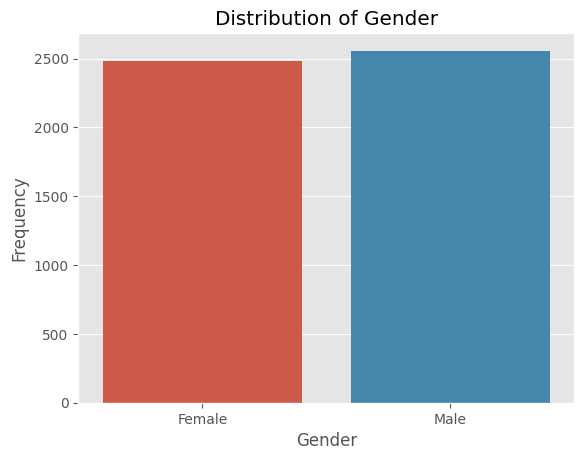

In [5]:
#Plot of Gender Distribution
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Gender distribution is almost even, with Males exceeding females by a very small margin

TotalCharges column

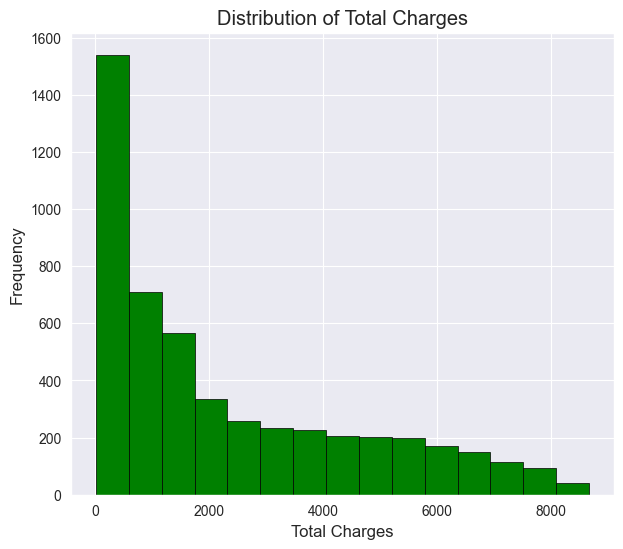

In [21]:
#Visualization of frequency distribution of total charges column

plt.figure(figsize=(7,6))
plt.hist(df['TotalCharges'], bins=15, color='g', edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')
plt.show()

The above visualization depicts that charges below 2000 had highest frequency and most charged to the customers of the telecommunications company. The total charged values are skewed and have high variability/range.

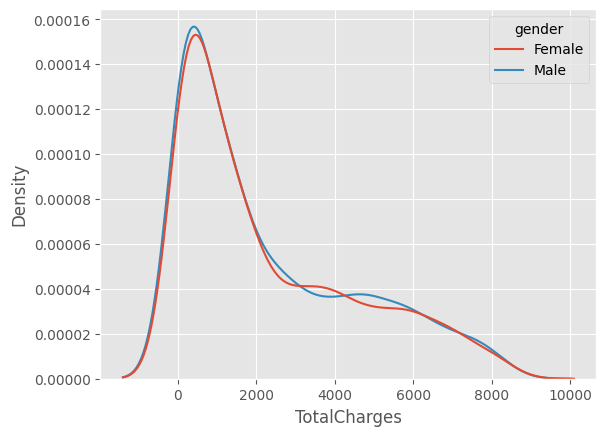

In [8]:
# A distribution plot to show the skewness in detail
sns.kdeplot(x='TotalCharges', data=df, hue='gender');

Multiplelines column

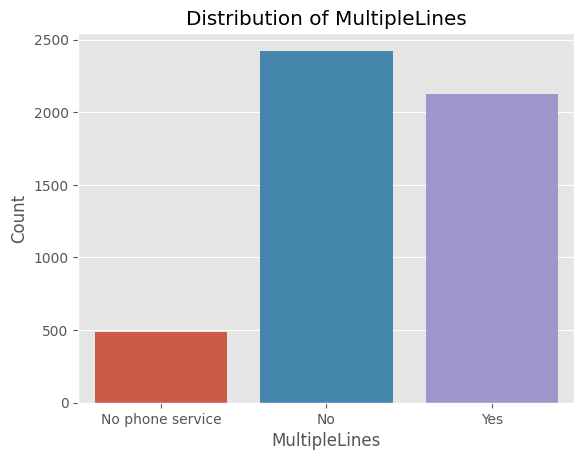

In [9]:
#Plot of Distribution on MultipleLines column
sns.countplot(x=df['MultipleLines'])
#plt.xlabel('Posession of MultipleLines')
plt.ylabel('Count')
plt.title('Distribution of MultipleLines')
plt.show()

Majority of the clients use one line on their phone followed closely by clients who preffered to have multiple lines. There are few clients who do not have access to a phone.

Payment Method column

In [11]:
# Visualization of Payment Method column

PaymentMethod_Count = df['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count 

PaymentMethod
Credit card (automatic)      1090
Bank transfer (automatic)    1124
Mailed check                 1126
Electronic check             1700
Name: count, dtype: int64

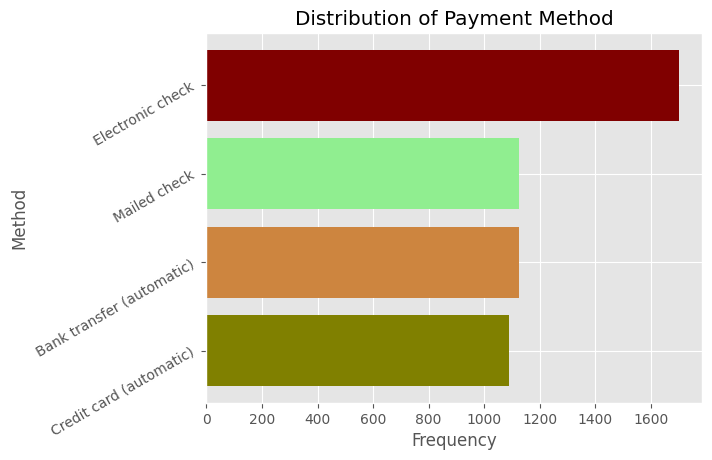

In [12]:
#Use of horizontal bar plot for visualization
c = ['olive', 'peru','lightgreen','maroon']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values, color = c)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=30)
plt.show();

Vizualization shows us that majority of the customers preffered Electronic Check as a method of payment.

 InternetService Column

In [13]:
# Visualization of InternetService column
df['InternetService'].replace('No', 'No Internet Service', inplace=True)

InternetService_Count = df['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1079
DSL                    1713
Fiber optic            2248
Name: count, dtype: int64

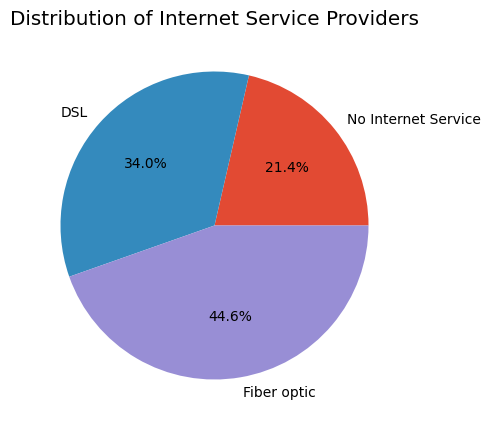

In [14]:
#Plotting a pie chart
#Should discuss with my team what'No' represents

plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

Majority of customer's preffered Fibre optic for internet service provision

 Contract column

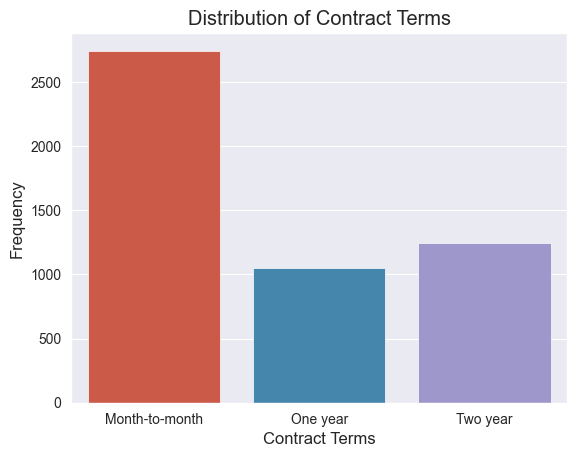

In [15]:
#Use of count plot for visualization
sns.set_style('darkgrid')
sns.countplot(data=df, x='Contract')
plt.xlabel('Contract Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Terms')
#plt.xticks(rotation=25)
plt.show();

Dependents column

In [16]:
#Vizualization of dependents

fig = px.pie(df, names='Dependents', title='Distribution of Dependents')
font_style = {'family':'Arial', 'size':18, 'color':'black'}
#customize title font
fig.update_layout(title_font=font_style, title_x=0.5)
#Customize text inside pie chart
fig.update_traces(textfont=font_style)
#Customize legend
fig.update_layout(legend=dict(font=dict(font_style)))
fig.show()

Majority of the customers had no dependents 

Bivariate Analysis

Relationship of Tenure and Churn columns

In [17]:
fig = px.violin(df, x='Churn', y='tenure', color='Churn', box=True, points='all', title='Relationship between Tenure and Churn')
#show the plot
fig.show()

The visualization shows that clients with a lower tenure had the highest likelihood to churn, and clients with highest tenure had the lowest chances that they will churn.